In [113]:
import pymongo
import pandas as pd
import numpy as np

In [6]:
client = pymongo.MongoClient(host='localhost', port=27017)
db = client['comments']
collection = db['陈百强']
# 将数据库数据转为dataFrame
data = pd.DataFrame(list(collection.find()))

In [7]:
print(data.shape)

(1025, 3)


In [8]:
num=data['comments']

In [9]:
print(data.columns.values.tolist())

['_id', 'comments', 'hotComments']


In [10]:
print(pd.DataFrame(num.iloc[0]).shape)

(20, 16)


In [11]:
result=pd.DataFrame(num.iloc[0])
for i in range(1,1025):
    data2=pd.DataFrame(num.iloc[i])
    result=pd.concat([result,data2],ignore_index=True)

In [12]:
print(result.shape)

(20500, 16)


In [13]:
print(result.columns.values.tolist())

['beReplied', 'commentId', 'commentLocationType', 'content', 'decoration', 'expressionUrl', 'isRemoveHotComment', 'liked', 'likedCount', 'parentCommentId', 'pendantData', 'repliedMark', 'showFloorComment', 'status', 'time', 'user']


In [14]:
result['content']

0                                                  都是有故事的人
1                                             每天都要听至爱Danny
2                                       对呀，你就从来没喜欢过我。一点都煤油
3                                                  沁入心脾的温柔
4                                                 最近好喜欢这首歌
5                                                   今日点歌③.
6                                                偏偏对你没有抵抗力
7        那一次我们擦肩而过，我害怕我们会像电影里的情景一样错过，所以我没有走，我一直看着你走，可是你...
8                                      “我喜欢你”珍贵，奈何听的人不珍惜……
9                                               偏偏喜欢你  王雷雷
10                                              对啊，这是为什么呢。
11                                                   对，好浪漫
12                                 小时候有个小的收音机，好开心，睡觉都舍不得放下
13                                                      好听
14                                          这些歌曲都是经典作品[亲亲]
15                                           偏偏喜欢你，我的翩翩夫人。
16                                       以爱情  以时光\n\n纪贯新

In [15]:
result['user'].iloc[1]['userId']

1724358802

In [16]:
text = pd.DataFrame(np.arange(41000).reshape(20500,2),columns=list('wx'))  

In [17]:
text.shape

(20500, 2)

In [18]:
text.rename(columns={'w':'userID', 'x':'context'}, inplace = True)

In [19]:
text['context']=result['content']

In [20]:
text.head

<bound method NDFrame.head of        userID                                            context
0           0                                            都是有故事的人
1           2                                       每天都要听至爱Danny
2           4                                 对呀，你就从来没喜欢过我。一点都煤油
3           6                                            沁入心脾的温柔
4           8                                           最近好喜欢这首歌
5          10                                             今日点歌③.
6          12                                          偏偏对你没有抵抗力
7          14  那一次我们擦肩而过，我害怕我们会像电影里的情景一样错过，所以我没有走，我一直看着你走，可是你...
8          16                                “我喜欢你”珍贵，奈何听的人不珍惜……
9          18                                         偏偏喜欢你  王雷雷
10         20                                         对啊，这是为什么呢。
11         22                                              对，好浪漫
12         24                            小时候有个小的收音机，好开心，睡觉都舍不得放下
13         26                                               

In [17]:
for i in range(0,20500):
    text.iloc[i,0]=result['user'].iloc[i]['userId']

In [18]:
print(text)

           userID                                            context
0       328901978                                            都是有故事的人
1      1724358802                                       每天都要听至爱Danny
2       451250610                                 对呀，你就从来没喜欢过我。一点都煤油
3       554348857                                            沁入心脾的温柔
4      1296389446                                           最近好喜欢这首歌
5       303721726                                             今日点歌③.
6      1654009353                                          偏偏对你没有抵抗力
7      1654009353  那一次我们擦肩而过，我害怕我们会像电影里的情景一样错过，所以我没有走，我一直看着你走，可是你...
8       357343565                                “我喜欢你”珍贵，奈何听的人不珍惜……
9       293896875                                         偏偏喜欢你  王雷雷
10     1510414811                                         对啊，这是为什么呢。
11     1574359988                                              对，好浪漫
12     1333924430                            小时候有个小的收音机，好开心，睡觉都舍不得放下
13       64188725                 

In [19]:
import jieba

In [20]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

In [21]:
data["title_cutted"] = text['context'].apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.289 seconds.
Prefix dict has been built succesfully.


In [22]:
data.title_cutted.head()

0                       都 是 有 故事 的 人
1                  每天 都 要 听 至爱 Danny
2    对 呀 ， 你 就 从来 没 喜欢 过 我 。 一点 都 煤油
3                         沁入 心脾 的 温柔
4                       最近 好 喜欢 这 首歌
Name: title_cutted, dtype: object

In [23]:
text.head()

,userID,context
0,328901978,都是有故事的人
1,1724358802,每天都要听至爱Danny
2,451250610,对呀，你就从来没喜欢过我。一点都煤油
3,554348857,沁入心脾的温柔
4,1296389446,最近好喜欢这首歌


In [24]:
type(text)

pandas.core.frame.DataFrame

In [30]:
import os
os.chdir('G:\\项目\\网易云音乐评论\\文本挖掘')  # 打印当前工作目录

In [31]:
text.to_csv('text.csv',index=False,header=True)

In [25]:
text.shape

(20500, 2)

In [26]:
kk=text

In [27]:
kk['context']

0                                                  都是有故事的人
1                                             每天都要听至爱Danny
2                                       对呀，你就从来没喜欢过我。一点都煤油
3                                                  沁入心脾的温柔
4                                                 最近好喜欢这首歌
5                                                   今日点歌③.
6                                                偏偏对你没有抵抗力
7        那一次我们擦肩而过，我害怕我们会像电影里的情景一样错过，所以我没有走，我一直看着你走，可是你...
8                                      “我喜欢你”珍贵，奈何听的人不珍惜……
9                                               偏偏喜欢你  王雷雷
10                                              对啊，这是为什么呢。
11                                                   对，好浪漫
12                                 小时候有个小的收音机，好开心，睡觉都舍不得放下
13                                                      好听
14                                          这些歌曲都是经典作品[亲亲]
15                                           偏偏喜欢你，我的翩翩夫人。
16                                       以爱情  以时光\n\n纪贯新

In [155]:
import os
os.chdir('G:\\项目\\网易云音乐评论')  # 打印当前工作目录

In [157]:
import jieba
import re
from PIL import Image
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[('偏偏 喜欢', 859), ('喜欢 喜欢', 609), ('年代 香港', 538), ('那个 时候', 534), ('喜欢 你有', 528), ('突然 觉得', 527), ('感觉偏偏 喜欢', 523), ('喜欢 类型', 523), ('喜欢 唱歌', 522), ('默默 流泪', 522), ('看着 歌词', 522), ('喜欢 表白', 522), ('回家 路上', 522), ('特别 那个', 521), ('哭偏偏 喜欢', 521), ('遇到 坏人', 521), ('id 灵性毕竟', 520), ('灵性毕竟 相差', 520), ('相差 十岁', 520), ('十岁 觉得', 520), ('觉得 适合', 520), ('适合 她学校', 520), ('她学校 下午', 520), ('下午 预备', 520), ('预备 铃最爱', 520), ('铃最爱 年代', 520), ('香港 乐坛有种', 520), ('乐坛有种 喜欢', 520), ('表白 感觉偏偏', 520), ('喜欢 龙颖谢谢', 520), ('龙颖谢谢 流泪您', 520), ('流泪您 后喜欢', 520), ('后喜欢 他既然', 520), ('他既然 喜欢', 520), ('类型 歌曲', 520), ('歌曲 推荐', 520), ('推荐 陈百强', 520), ('陈百强 几首', 520), ('几首 经典歌曲', 520), ('经典歌曲 愿意', 520), ('愿意 伤痕', 520), ('伤痕 涟漪', 520), ('涟漪 浪潮', 520), ('浪潮 冷暖', 520), ('冷暖 风铃', 520), ('风铃 醋意', 520), ('醋意 梦里', 520), ('梦里 人冬恋', 520), ('人冬恋 别话', 520), ('别话 梦呓', 520)]


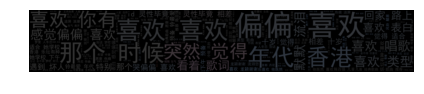

In [158]:
jieba.load_userdict("userdict.txt")
text=''
for i in kk['context'].values:
# for i in data[data.year == 2018]['title'].values:
    # 替换无用字符
    symbol_to_replace = '[!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    # data['name'].str.replace(symbol_to_replace,'',inplace=True,regex=True)
    i = re.sub(symbol_to_replace,'',i)
    # print(i)
    text+=' '.join(jieba.cut(i,cut_all=False))

# text = jieba.del_word('如何')
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

background_Image = np.array(Image.open(path.join(d, "tiger.jpg")))
# background_Image = plt.imread('./tiger.jpg')

font_path = 'C:\Windows\Fonts\simhei.ttf'  # 思源黑,黑体simhei.ttf
# 添加stopswords
stopwords = set()
# 先运行对text进行词频统计再排序，再选择要增加的停用词
stopwords.update(['如何','怎么','一个','什么','为什么','还是','我们','为何','可能','不是','没有','哪些','成为','可以','背后','到底','就是','这么','不要','怎样','为了','能否','你们','还有','这样','这个','真的','那些'])

wc = WordCloud(
    # background_color = '#3F3F3F',
    # background_color = 'white',
    background_color = 'black',
    font_path = font_path,
    mask = background_Image,
    stopwords = stopwords,
    max_words = 200,
    # width = 1000,height=600,
    margin =2,
    max_font_size = 100,
    random_state = 42,
    scale = 2,
    # colormap = 'viridis'
)
wc.generate_from_text(text)

process_word = WordCloud.process_text(wc, text)
# 下面是字典排序
sort = sorted(process_word.items(),key=lambda e:e[1],reverse=True) # sort为list
print(sort[:50])  # 输出前词频最高的前50个，然后筛选出不需要的stopwords，添加到前面的stopwords.update()方法中
img_colors = ImageColorGenerator(background_Image)
wc.recolor(color_func=img_colors)  # 颜色跟随图片颜色

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()  # 自动控制空白边缘，以全部显示x轴名称
plt.savefig('huxiu5.png',dpi=200)
plt.show()

In [28]:
kk['context'].values

array(['都是有故事的人', '每天都要听至爱Danny', '对呀，你就从来没喜欢过我。一点都煤油', ..., '别咒王杰',
       '我爸只会唱一首歌，就这首歌把我妈娶到手了。[憨笑][憨笑]', '2000年生却偏偏喜欢80年代'], dtype=object)

In [52]:
import sys
print('目前系统的编码为：',sys.getdefaultencoding())
name='小明'
print(type(name))#首先我们来打印下转码前的name类型，因为它是str，所以可以通过encode来进行编码
name1=name.encode('utf-8')
print(name1)

目前系统的编码为： utf-8
<class 'str'>
b'\xe5\xb0\x8f\xe6\x98\x8e'


In [55]:
name2=name1.decode('utf-8')
print(type(name2))
print(name2)

<class 'str'>
小明


In [54]:
name1=name.encode('utf-8')
name2=name1.decode('utf-8')
name3=name2.encode('gbk')
name4=name3.decode('gbk')
print(type(name3))
print(name3)
print(type(name4))
print(name4)

<class 'bytes'>
b'\xd0\xa1\xc3\xf7'
<class 'str'>
小明


In [62]:
s='\xcf\xc2\xce\xe7'

In [63]:
print(type(s))

<class 'str'>


In [64]:
print(s)

ÏÂÎç


In [59]:
d='\xc8\xc7'

In [60]:
print(type(d))

<class 'str'>


In [68]:
s.encode('utf-8')

b'\xc3\x8f\xc3\x82\xc3\x8e\xc3\xa7'

In [69]:
a='\xe9\xa3\x9e'
print(a)

é£


In [70]:
a="\xe9\xa3\x9e"
print(a)

é£


In [20]:
data.iloc[:,-1]

0                                                  context
1                                                  都是有故事的人
2                                             每天都要听至爱Danny
3                                       对呀，你就从来没喜欢过我。一点都煤油
4                                                  沁入心脾的温柔
5                                                 最近好喜欢这首歌
6                                                   今日点歌③.
7                                                偏偏对你没有抵抗力
8        那一次我们擦肩而过，我害怕我们会像电影里的情景一样错过，所以我没有走，我一直看着你走，可是你...
9                                      “我喜欢你”珍贵，奈何听的人不珍惜……
10                                              偏偏喜欢你  王雷雷
11                                              对啊，这是为什么呢。
12                                                   对，好浪漫
13                                 小时候有个小的收音机，好开心，睡觉都舍不得放下
14                                                      好听
15                                          这些歌曲都是经典作品[亲亲]
16                                           偏偏喜欢你，我的翩翩夫

In [22]:
import jieba

In [23]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

In [29]:
a=data.iloc[:,-1]

In [2]:
import os
os.chdir('G:\\项目\\网易云音乐评论\\文本挖掘')  # 打印当前工作目录

In [3]:
import pandas as pd
data = pd.read_csv(r"train.csv",encoding='gbk', sep=',', header=None)
print(data)

             0            1                                                  2
0          NaN       userID                                            context
1          1.0    328901978                                            都是有故事的人
2          2.0   1724358802                                       每天都要听至爱Danny
3          3.0    451250610                                 对呀，你就从来没喜欢过我。一点都煤油
4          4.0    554348857                                            沁入心脾的温柔
5          5.0   1296389446                                           最近好喜欢这首歌
6          6.0    303721726                                             今日点歌③.
7          7.0   1654009353                                          偏偏对你没有抵抗力
8          8.0   1654009353  那一次我们擦肩而过，我害怕我们会像电影里的情景一样错过，所以我没有走，我一直看着你走，可是你...
9          9.0    357343565                                “我喜欢你”珍贵，奈何听的人不珍惜……
10        10.0    293896875                                         偏偏喜欢你  王雷雷
11        11.0   1510414811                         

In [4]:
data.shape

(20524, 3)

In [5]:
names=pd.DataFrame(data.iloc[:,1])

In [6]:
names=names.drop(0)

In [7]:
names.head

<bound method NDFrame.head of                  1
1        328901978
2       1724358802
3        451250610
4        554348857
5       1296389446
6        303721726
7       1654009353
8       1654009353
9        357343565
10       293896875
11      1510414811
12      1574359988
13      1333924430
14        64188725
15       482121141
16       427963594
17      1382017788
18        46656982
19       425557078
20       有一个人曾让我知道
21     寄生于世原来是那么的好
22       568096298
23       412381224
24       301593622
25      1455906926
26      1670031755
27       301593622
28      1730181168
29       279684331
30       621542625
...            ...
20494     62338668
20495     62338668
20496     68320201
20497    246752393
20498    134205876
20499    122104993
20500    100442347
20501    118207115
20502    116595775
20503     60109810
20504     63357164
20505     62338668
20506     95087236
20507     68320201
20508     79282042
20509     83512955
20510     67061365
20511     71401843
20512    103882075
2

In [8]:
data=data.drop([0,1],axis=1)

In [9]:
data=data.drop(0)

In [10]:
data.head

<bound method NDFrame.head of                                                        2
1                                                都是有故事的人
2                                           每天都要听至爱Danny
3                                     对呀，你就从来没喜欢过我。一点都煤油
4                                                沁入心脾的温柔
5                                               最近好喜欢这首歌
6                                                 今日点歌③.
7                                              偏偏对你没有抵抗力
8      那一次我们擦肩而过，我害怕我们会像电影里的情景一样错过，所以我没有走，我一直看着你走，可是你...
9                                    “我喜欢你”珍贵，奈何听的人不珍惜……
10                                            偏偏喜欢你  王雷雷
11                                            对啊，这是为什么呢。
12                                                 对，好浪漫
13                               小时候有个小的收音机，好开心，睡觉都舍不得放下
14                                                    好听
15                                        这些歌曲都是经典作品[亲亲]
16                                         偏偏喜欢你，我的翩翩夫人。
1

In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.shape

(20523, 1)

In [13]:
type(names)

pandas.core.frame.DataFrame

In [14]:
data.rename(index=names.iloc[:,0],columns={2:'context'}, inplace = True)

In [15]:
data.head

<bound method NDFrame.head of                                                        context
328901978                                              都是有故事的人
1724358802                                        每天都要听至爱Danny
451250610                                   对呀，你就从来没喜欢过我。一点都煤油
554348857                                              沁入心脾的温柔
1296389446                                            最近好喜欢这首歌
303721726                                               今日点歌③.
1654009353                                           偏偏对你没有抵抗力
1654009353   那一次我们擦肩而过，我害怕我们会像电影里的情景一样错过，所以我没有走，我一直看着你走，可是你...
357343565                                  “我喜欢你”珍贵，奈何听的人不珍惜……
293896875                                           偏偏喜欢你  王雷雷
1510414811                                          对啊，这是为什么呢。
1574359988                                               对，好浪漫
1333924430                             小时候有个小的收音机，好开心，睡觉都舍不得放下
64188725                                                    好听
482121141                

In [16]:
data.to_csv(r'DealtedData.csv',encoding='gbk')

In [17]:
###
import jieba

In [18]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

In [19]:
d=pd.DataFrame(data['context'].astype(str))

In [20]:
d.columns.values.tolist()

['context']

In [21]:
d["title_cutted"] = d['context'].apply(chinese_word_cut)
d.title_cutted.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.189 seconds.
Prefix dict has been built succesfully.


328901978                        都 是 有 故事 的 人
1724358802                  每天 都 要 听 至爱 Danny
451250610     对 呀 ， 你 就 从来 没 喜欢 过 我 。 一点 都 煤油
554348857                          沁入 心脾 的 温柔
1296389446                       最近 好 喜欢 这 首歌
Name: title_cutted, dtype: object

In [29]:
k=d.title_cutted

In [36]:
d.head

<bound method NDFrame.head of                                                        context  \
328901978                                              都是有故事的人   
1724358802                                        每天都要听至爱Danny   
451250610                                   对呀，你就从来没喜欢过我。一点都煤油   
554348857                                              沁入心脾的温柔   
1296389446                                            最近好喜欢这首歌   
303721726                                               今日点歌③.   
1654009353                                           偏偏对你没有抵抗力   
1654009353   那一次我们擦肩而过，我害怕我们会像电影里的情景一样错过，所以我没有走，我一直看着你走，可是你...   
357343565                                  “我喜欢你”珍贵，奈何听的人不珍惜……   
293896875                                           偏偏喜欢你  王雷雷   
1510414811                                          对啊，这是为什么呢。   
1574359988                                               对，好浪漫   
1333924430                             小时候有个小的收音机，好开心，睡觉都舍不得放下   
64188725                                      

In [27]:
d.shape

(20523, 2)

In [32]:
k=pd.DataFrame(k)

In [33]:
print(k.columns.values.tolist())

['title_cutted']


In [34]:
k.head()

,title_cutted
328901978,都 是 有 故事 的 人
1724358802,每天 都 要 听 至爱 Danny
451250610,对 呀 ， 你 就 从来 没 喜欢 过 我 。 一点 都 煤油
554348857,沁入 心脾 的 温柔
1296389446,最近 好 喜欢 这 首歌


In [35]:
k.to_csv(r'k.csv',encoding='gbk',index=True,header=True)

In [265]:
type(data['context'])

pandas.core.series.Series

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [38]:
vectorizer = CountVectorizer()
count = vectorizer.fit_transform(d.title_cutted)
print(vectorizer.get_feature_names())  

['00', '01', '010', '02', '0207', '03', '04', '05', '0527', '07', '08', '09', '10', '100', '1000', '10000', '10086', '1018', '10w', '11', '110', '111', '12', '1217', '1220', '122384797', '122515602', '126815676', '13', '1332', '1350641001', '138', '13w', '14', '141', '15', '15293070107', '16', '160', '17', '18', '180', '19', '1900', '1955', '1958', '1974', '1975', '1980', '1983', '1984', '1989', '1993', '1w', '20', '2000', '2001', '2004', '2006', '2009', '201', '2010', '2011', '2013', '2014', '2015', '2016', '2017', '2018', '20180407', '20181129ghw', '2019', '2020', '2046', '21', '210', '211', '22', '223', '225', '23', '233', '233333333', '236', '24', '25', '253524477', '26', '27', '276045855', '278097385', '28', '284', '29', '2936', '30', '305', '31', '32', '33', '33032', '33033', '34', '341364283', '34444', '35', '36', '363', '365', '37', '38888', '38889', '39', '3d', '3w', '40', '4000', '40000', '41', '42', '44', '45', '46', '47', '48', '4w', '50', '500', '5000', '51', '52', '520', 

In [270]:
print(vectorizer.vocabulary_)

{'故事': 6694, '每天': 7759, '至爱': 10103, 'danny': 252, '从来': 1885, '喜欢': 3777, '一点': 803, '煤油': 8436, '沁入': 7880, '心脾': 5636, '温柔': 8233, '最近': 7194, '首歌': 11920, '今日': 1863, '点歌': 8383, '偏偏': 2226, '没有': 7941, '抵抗力': 6369, '一次': 787, '我们': 6052, '擦肩而过': 6630, '害怕': 4776, '电影': 8799, '情景': 5858, '一样': 779, '错过': 11479, '所以': 6182, '一直': 826, '看着': 9095, '可是': 3350, '回头': 3848, '一眼': 828, '珍贵': 8683, '奈何': 4376, '珍惜': 8680, '王雷雷': 8642, '这是': 11085, '为什么': 1453, '浪漫': 8115, '小时候': 4912, '有个': 7208, '收音机': 6650, '好开心': 4462, '睡觉': 9183, '舍不得': 10111, '放下': 6662, '好听': 4444, '这些': 11063, '歌曲': 7650, '经典作品': 9647, '亲亲': 1735, '翩翩': 9789, '夫人': 4345, '爱情': 8485, '时光': 6969, '纪贯': 9594, '一家': 716, '吃饭': 3397, '店里': 5259, '知道': 9202, '什么': 1842, '一下': 607, '爱心': 8482, '幸福': 5221, 'nan': 444, '超级': 10823, '一首歌': 907, '大赞': 4234, '可能': 3361, '单手': 3036, '法拉利': 7987, '多多': 4104, '大笑': 4222, '活下去': 8045, '再见': 2488, '大渣': 4213, '憨笑': 6014, '还俗': 11036, '更穷': 7141, '现在': 8663, '一心': 732, '只想': 3307, 

In [275]:
print(count.toarray())

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [276]:
count.shape

(20523, 12111)

In [277]:
type(count)

scipy.sparse.csr.csr_matrix

In [278]:
B = count.todense()

In [279]:
type(B)

numpy.matrixlib.defmatrix.matrix

In [280]:
C=pd.DataFrame(B)

In [281]:
C.to_csv(r'count.csv',encoding='gbk')

In [282]:
C.to_csv(r'count2.csv',encoding='gbk',index=True,header=True)

In [286]:
tfidf_vec = TfidfVectorizer() 
tfidf_matrix = tfidf_vec.fit_transform(d.title_cutted)

In [287]:
print(tfidf_vec.get_feature_names())

['00', '01', '010', '02', '0207', '03', '04', '05', '0527', '07', '08', '09', '10', '100', '1000', '10000', '10086', '1018', '10w', '11', '110', '111', '12', '1217', '1220', '122384797', '122515602', '126815676', '13', '1332', '1350641001', '138', '13w', '14', '141', '15', '15293070107', '16', '160', '17', '18', '180', '19', '1900', '1955', '1958', '1974', '1975', '1980', '1983', '1984', '1989', '1993', '1w', '20', '2000', '2001', '2004', '2006', '2009', '201', '2010', '2011', '2013', '2014', '2015', '2016', '2017', '2018', '20180407', '20181129ghw', '2019', '2020', '2046', '21', '210', '211', '22', '223', '225', '23', '233', '233333333', '236', '24', '25', '253524477', '26', '27', '276045855', '278097385', '28', '284', '29', '2936', '30', '305', '31', '32', '33', '33032', '33033', '34', '341364283', '34444', '35', '36', '363', '365', '37', '38888', '38889', '39', '3d', '3w', '40', '4000', '40000', '41', '42', '44', '45', '46', '47', '48', '4w', '50', '500', '5000', '51', '52', '520', 

In [ ]:
print(tfidf_vec.vocabulary_)

In [288]:
print(tfidf_matrix.toarray())

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
#n_features = 1000

In [ ]:
transformer.fit_transform

In [82]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                #max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(d.title_cutted)

In [103]:
print(tf_vectorizer.get_feature_names())  

['00', '01', '02', '10', '11', '12', '14', '15', '16', '17', '18', '19', '1983', '20', '2018', '2019', '22', '23', '24', '25', '27', '30', '35', '40', '60', '70', '789', '80', '90', '93', '95', '96', '97', '98', '99', 'danny', 'fm', 'id', 'ktv', 'nan', 'qq', 'van', '一下', '一个', '一些', '一人', '一件', '一份', '一位', '一切', '一句', '一听', '一场', '一声', '一天', '一如', '一定', '一家', '一年', '一张', '一杯', '一样', '一次', '一段', '一段时间', '一点', '一片', '一生', '一生何求', '一直', '一瞬', '一瞬间', '一种', '一般', '一起', '一辈子', '一边', '一遍', '一部', '一面', '一首', '一首歌', '七年', '三个', '三天', '三年', '上天', '上班', '上课', '下午', '下去', '下楼去', '下载', '下面', '不了', '不会', '不信', '不再', '不到', '不可', '不同', '不够', '不好', '不好意思', '不如', '不得', '不得不', '不想', '不敢', '不是', '不止', '不然', '不用', '不知', '不管', '不能', '不行', '不要', '不见', '不过', '不错', '世上', '世界', '世间', '东西', '两个', '两天', '两年', '个人', '中国', '中意', '中间', '丹尼', '为了', '为什么', '为何', '为啥', '主动', '之一', '之前', '之后', '之间', '乐坛', '九十年代', '也好', '也许', '习惯', '了解', '事情', '于是', '互相', '五年', '享受', '亲亲', '亲爱', '人家', '人才', '人生', '人能', '什么', '今天', '今年', 

In [96]:
print(tf)

  (0, 612)	1
  (1, 35)	1
  (1, 699)	1
  (2, 65)	1
  (2, 348)	1
  (2, 167)	1
  (3, 730)	1
  (4, 1029)	1
  (4, 658)	1
  (4, 348)	1
  (6, 711)	1
  (6, 196)	1
  (7, 362)	1
  (7, 297)	1
  (7, 811)	1
  (7, 69)	1
  (7, 582)	1
  (7, 1002)	1
  (7, 61)	1
  (7, 777)	1
  (7, 446)	1
  (7, 570)	2
  (7, 62)	1
  (7, 711)	2
  (8, 763)	1
  :	:
  (20518, 529)	5
  (20518, 72)	1
  (20518, 391)	1
  (20518, 760)	1
  (20518, 570)	1
  (20519, 213)	1
  (20519, 592)	1
  (20519, 758)	1
  (20519, 619)	1
  (20519, 491)	1
  (20519, 687)	1
  (20519, 386)	1
  (20519, 741)	1
  (20519, 320)	1
  (20519, 1029)	1
  (20520, 759)	1
  (20521, 285)	1
  (20521, 575)	1
  (20521, 566)	2
  (20521, 81)	1
  (20521, 1029)	1
  (20522, 27)	1
  (20522, 481)	1
  (20522, 196)	1
  (20522, 348)	1


In [104]:
print(tf_vectorizer.vocabulary_)

{'故事': 612, '每天': 699, 'danny': 35, '从来': 167, '喜欢': 348, '一点': 65, '温柔': 730, '最近': 658, '首歌': 1029, '偏偏': 196, '没有': 711, '一次': 62, '我们': 570, '害怕': 446, '电影': 777, '一样': 61, '错过': 1002, '所以': 582, '一直': 69, '看着': 811, '可是': 297, '回头': 362, '珍贵': 764, '珍惜': 763, '这是': 967, '为什么': 134, '浪漫': 722, '小时候': 459, '有个': 659, '收音机': 605, '睡觉': 824, '舍不得': 894, '放下': 607, '好听': 417, '这些': 963, '歌曲': 692, '亲亲': 153, '翩翩': 873, '爱情': 749, '时光': 631, '一家': 57, '知道': 826, '什么': 159, '一下': 42, '爱心': 748, '幸福': 488, 'nan': 39, '超级': 940, '一首歌': 81, '可能': 299, '多多': 380, '大笑': 392, '再见': 221, '憨笑': 566, '现在': 760, '只想': 286, '比较': 704, '哈哈哈哈': 337, '这个': 960, '年代': 481, '就是': 464, '曾经': 651, '如今': 425, '听到': 320, '心里': 522, '之后': 140, '永远': 707, '打卡': 589, '更好': 650, '一首': 80, '粤语歌': 850, '可爱': 298, '以前': 172, '舒服': 895, '不是': 109, '一年': 58, '以为': 171, '十年': 264, '原来': 275, '如此': 429, '简单': 847, '后面': 316, '原唱': 273, '当时': 502, '真的': 818, '谈恋爱': 931, '努力': 259, '天妒': 395, '英才': 897, '心底': 515, '负累':

In [98]:
tf.shape

(20523, 1044)

In [100]:
type(tf)

scipy.sparse.csr.csr_matrix

In [99]:
print(tf)

  (0, 612)	1
  (1, 35)	1
  (1, 699)	1
  (2, 65)	1
  (2, 348)	1
  (2, 167)	1
  (3, 730)	1
  (4, 1029)	1
  (4, 658)	1
  (4, 348)	1
  (6, 711)	1
  (6, 196)	1
  (7, 362)	1
  (7, 297)	1
  (7, 811)	1
  (7, 69)	1
  (7, 582)	1
  (7, 1002)	1
  (7, 61)	1
  (7, 777)	1
  (7, 446)	1
  (7, 570)	2
  (7, 62)	1
  (7, 711)	2
  (8, 763)	1
  :	:
  (20518, 529)	5
  (20518, 72)	1
  (20518, 391)	1
  (20518, 760)	1
  (20518, 570)	1
  (20519, 213)	1
  (20519, 592)	1
  (20519, 758)	1
  (20519, 619)	1
  (20519, 491)	1
  (20519, 687)	1
  (20519, 386)	1
  (20519, 741)	1
  (20519, 320)	1
  (20519, 1029)	1
  (20520, 759)	1
  (20521, 285)	1
  (20521, 575)	1
  (20521, 566)	2
  (20521, 81)	1
  (20521, 1029)	1
  (20522, 27)	1
  (20522, 481)	1
  (20522, 196)	1
  (20522, 348)	1


In [89]:
type(tf)

scipy.sparse.csr.csr_matrix

In [92]:
kk=pd.DataFrame(list(tf))

In [93]:
kk.shape

(20523, 1)

In [94]:
tf_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [95]:
print(tf_vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
